#### Python implementation of a Feedforward Neural Network - FNN

In [26]:
import numpy as np
import matplotlib.pyplot as plt 

# Sigmoid activation function for hidden layer
def sigmoid(X,W,b):
    Z = 1 / (1 + np.exp(-X.dot(W) - b))
    return Z

# Softmax activation function for the output layer
def softmax(A):
    expA = np.exp(A)
    if A.ndim == 1:
        softmaxed = expA / expA.sum()  
    else:
        softmaxed = expA / expA.sum(axis=1, keepdims=True)  
    return softmaxed

In [27]:
# Setup functions 

# Forward pass: computes predictions, intermediate activations, and probabilities
def forward(X,W1,b1,W2,b2):
    Z = sigmoid(X,W1,b1)
    A = Z.dot(W2) + b2
    Y = softmax(A)

    predictions = np.argmax(Y,axis=1)
    return predictions,Y,Z


def classification_rate(y_true,y_pred):
    n_correct = 0
    for index,val in enumerate(y_pred):
        if y_pred[index] == y_true[index]:
            n_correct += 1

    return float(n_correct/len(y_pred))

def cross_entropy(y_true,y_pred):
    ce = y_true * np.log(y_pred + 1e-30) # Add a small value to avoid log(0)
    total_ce = ce.sum()
    return total_ce 

In [28]:
#Derivatives with respect to the cost fucntion of each layer

def derivative_b2(T, Y):
    return (T - Y).sum(axis=0)

def derivative_w2(Z, T, Y):
    return Z.T.dot(T - Y)

def derivative_b1(T, Y, W2, Z):
    return ((T - Y).dot(W2.T) * Z * (1 - Z)).sum(axis=0)

def derivative_w1(X, Z, T, Y, W2):
    dZ = (T - Y).dot(W2.T) * Z * (1 - Z)
    return X.T.dot(dZ)


cost: -3576.4977530414244 classification_rate: 0.3333333333333333
cost: -163.9534523133621 classification_rate: 0.9713333333333334
cost: -142.8227955857782 classification_rate: 0.972
cost: -135.6496742606583 classification_rate: 0.9713333333333334
cost: -131.25824812402152 classification_rate: 0.972
cost: -128.11484906506215 classification_rate: 0.972
cost: -125.7343461687856 classification_rate: 0.972
cost: -123.8588389728264 classification_rate: 0.972
cost: -122.3275363553109 classification_rate: 0.9733333333333334
cost: -121.03981907421263 classification_rate: 0.9733333333333334
cost: -119.93268592123104 classification_rate: 0.974
cost: -118.96579831821566 classification_rate: 0.974
cost: -118.1125325144289 classification_rate: 0.9733333333333334
cost: -117.3547328346758 classification_rate: 0.974
cost: -116.6795086151359 classification_rate: 0.974
cost: -116.07718628038363 classification_rate: 0.9746666666666667
cost: -115.53998350081274 classification_rate: 0.9746666666666667
cost

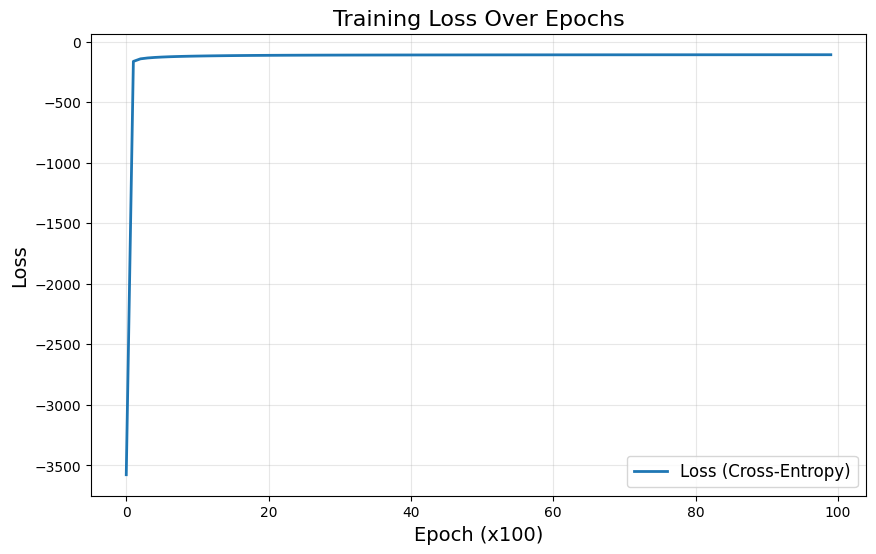

In [29]:
#Synthetic data generation

Nclass = 500 # Number of samples per class
D = 2 # Dimensionality of input
M = 3 # Hidden layer size (nodes number)
K = 3 # Number of classes

# Create data for three classes
X1 = np.random.randn(Nclass, D) + np.array([0, -2])
X2 = np.random.randn(Nclass, D) + np.array([2, 2])
X3 = np.random.randn(Nclass, D) + np.array([-2, 2])
X = np.vstack([X1, X2, X3])

# Assign labels to classes
Y = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass)
N = len(Y)

# Labels to one-hot encoded matrix
T = np.zeros((N, K))
for i in range(N):
    T[i, Y[i]] = 1


# Initialize random weights and biases
W1 = np.random.randn(D, M)
b1 = np.random.randn(M)
W2 = np.random.randn(M, K)
b2 = np.random.randn(K)

learning_rate = 1e-3
costs = []
for epoch in range(10000):
    predictions,output, hidden = forward(X, W1, b1, W2, b2)
    if epoch % 100 == 0:
        c = cross_entropy(T, output)
        r = classification_rate(Y, predictions)
        print("cost:", c, "classification_rate:", r)
        costs.append(c)


    # Backpropagation: compute gradients
    gW2 = derivative_w2(hidden, T, output)
    gb2 = derivative_b2(T, output)
    gW1 = derivative_w1(X, hidden, T, output, W2)
    gb1 = derivative_b1(T, output, W2, hidden)

    W2 += learning_rate * gW2
    b2 += learning_rate * gb2
    W1 += learning_rate * gW1
    b1 += learning_rate * gb1

plt.figure(figsize=(10, 6))
plt.plot(costs, label="Loss (Cross-Entropy)", linewidth=2)
plt.title("Training Loss Over Epochs", fontsize=16)
plt.xlabel("Epoch (x100)", fontsize=14)
plt.ylabel("Loss", fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.show()